<a href="https://colab.research.google.com/github/yybb212/Naver_Data_Competition/blob/master/Data_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline

from sklearn import datasets
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

iris = datasets.load_iris()


Saving Stat10.csv to Stat10 (1).csv
User uploaded file "Stat10.csv" with length 1022 bytes


In [0]:
df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
# sklearn provides the iris species as integer values since this is required for classification
# here we're just adding a column with the species names to the dataframe for visualisation
print(df.columns)
col = df.columns
print(col)

Index(['rank', 'goal', 'shoot', 'offside', 'conceded', 'tackle', 'clearing',
       'pass', 'touch', 'fairplay', 'group_num', 'group'],
      dtype='object')
Index(['rank', 'goal', 'shoot', 'offside', 'conceded', 'tackle', 'clearing',
       'pass', 'touch', 'fairplay', 'group_num', 'group'],
      dtype='object')


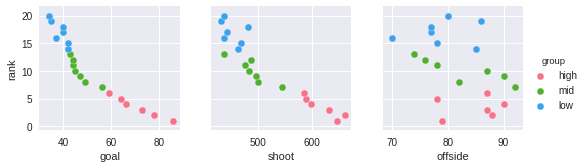

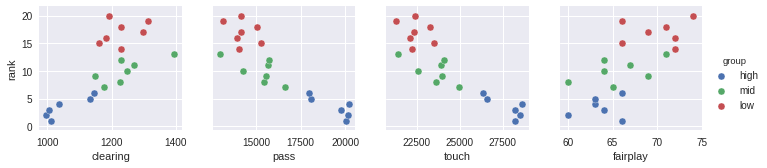

In [0]:

sns.pairplot(df, hue='group', 
             y_vars=['rank'],
             x_vars=['goal','shoot','offside'],
            palette="husl")
sns.pairplot(df, hue='group', 
             y_vars=['rank'],
             x_vars=col[6:10])

TypeError: ignored

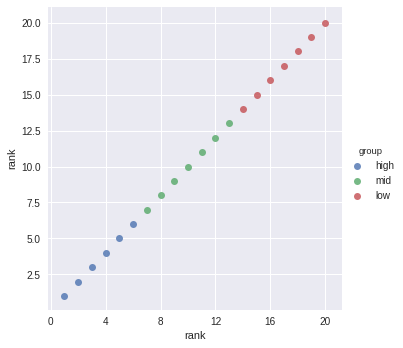

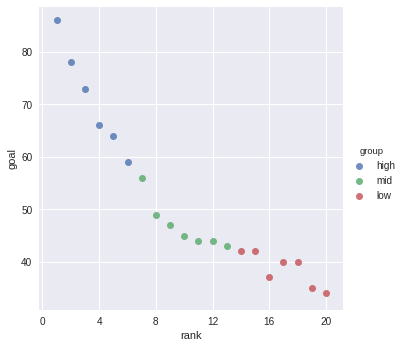

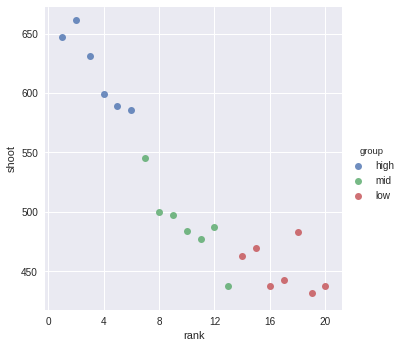

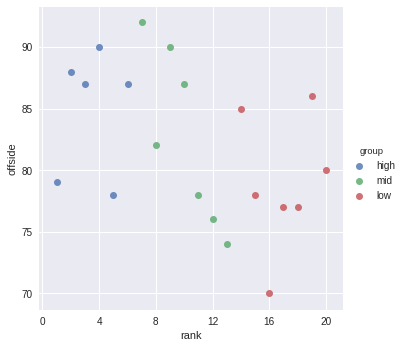

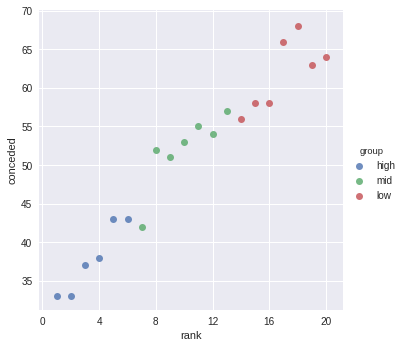

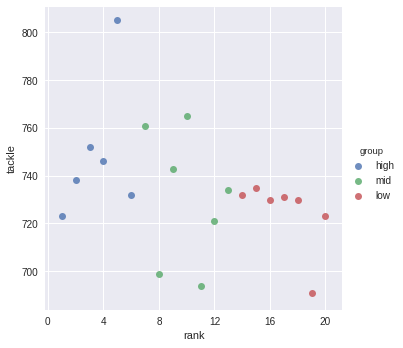

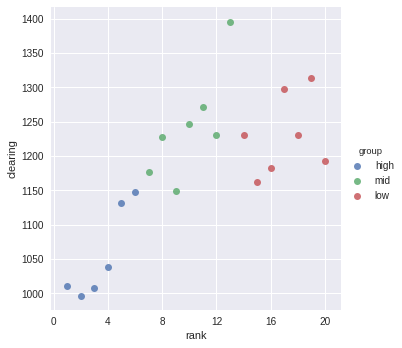

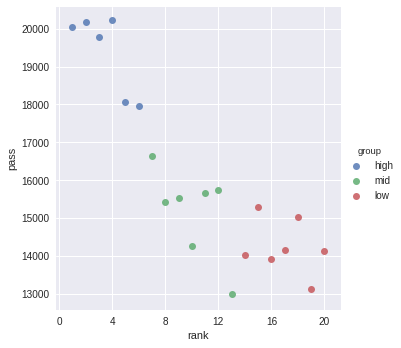

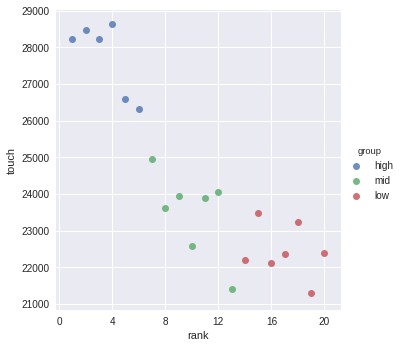

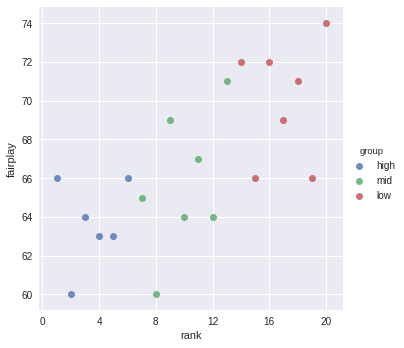

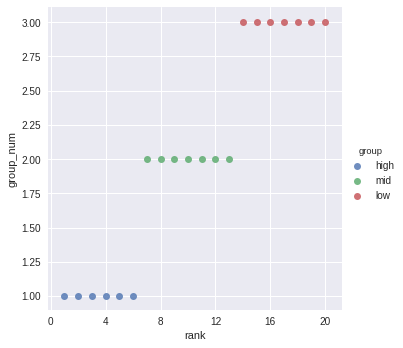

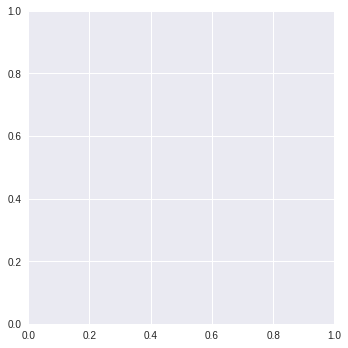

In [0]:

for i in col :
    g = sns.lmplot('rank', i, data=df, hue='group', fit_reg=False)
    g = (g.set( xticks=[4 * i for i in range(6)]))
#plt.ylim((0, 50000))

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[col[1:10]], df['group_num'], 
                                                    test_size=0.25, stratify=df['group_num'], random_state=123456)

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.783
Mean accuracy score: 0.817


94     3
203    1
118    3
128    2
102    1
135    3
50     2
25     1
90     2
145    1
37     3
190    2
162    1
222    1
194    3
207    2
133    3
221    1
10     2
217    3
55     3
87     2
237    3
95     3
155    3
209    2
136    3
174    3
141    1
16     3
211    2
120    1
196    3
182    1
158    3
24     1
232    2
22     1
172    2
212    2
148    2
62     1
40     1
138    3
129    2
86     2
77     3
205    1
74     3
70     2
6      2
64     1
122    1
210    2
199    3
8      2
97     3
126    2
69     2
161    1
Name: group_num, dtype: int64 [2 1 3 2 1 3 2 2 2 1 2 2 1 1 2 2 3 1 2 3 3 2 3 2 3 2 3 3 1 3 2 1 2 1 3 2 2
 1 2 3 2 1 1 3 2 2 2 1 3 2 2 1 1 2 3 2 3 1 3 1]
      high  mid  low
high    16    2    0
mid      1   18    2
low      0    6   15


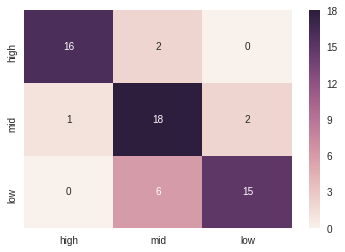

In [0]:
from sklearn.metrics import confusion_matrix

print(y_test, predicted)

cm = pd.DataFrame(data = confusion_matrix(y_test, predicted), columns=['high','mid','low'], index=['high','mid','low'])
print(cm)
sns.heatmap(cm, annot=True)

Automatically created module for IPython interactive environment
MSE: 6.4926
[0.28071444 0.12993488 0.03871581 0.18167535 0.06270472 0.05417404
 0.09407112 0.11195787 0.04605178]
Index(['offside', 'fairplay', 'clearing', 'tackle', 'pass', 'touch', 'shoot',
       'conceded', 'goal'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


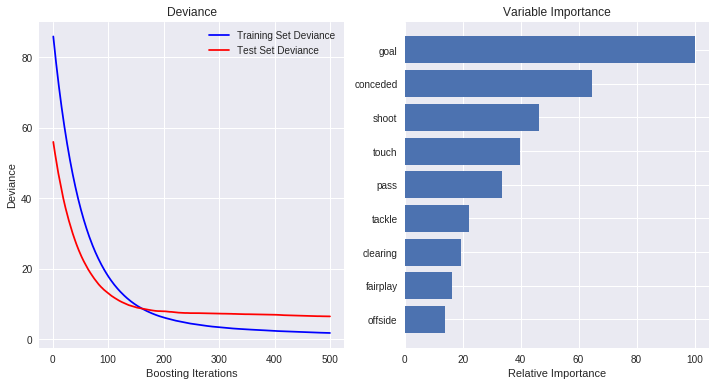

In [0]:
print(__doc__)

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
print(rf.feature_importances_)
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print(col[1:][sorted_idx])
print(type(col))
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, col[1:][sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()